# Amostras e populações

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Agora vamos falar daquele que talvez seja o conceito mais conhecido e que praticamente define o que fazemos em estatística: a amostra.

Imagine que você está querendo saber se possui uma doença. Para detectar a doença, é necessário realizar um exame de sangue. O que você faz? Retira todo o sangue do corpo para verificar se possui a doença? Claro que não! O que você faz é retirar uma pequena quantidade de sangue, que é a amostra, e verificar se a doença está presente.

Esse procedimento, do exame de sangue, é muito natural e faz parte do nosso cotidiano. É até um pouco óbvio pensar que não é necessário retirar todo o sangue do corpo para verificar se possui a doença. O que é interessante é que esse procedimento, que é o procedimento de amostragem, começa a ter menos confiança das pessoas quando é aplicado em outros contextos.

Por exemplo, vamos considerar as pesquisas eleitorais. Seguindo o mesmo princípio, quando uma pesquisa eleitoral é realizada, não é necessário entrevistar todos os eleitores para saber em quem eles vão votar, certo? O que é feito é entrevistar uma pequena quantidade de pessoas, que é a amostra, e verificar em quem elas vão votar. A partir disso, é possível fazer uma estimativa de como está a opinião pública a respeito de um conjunto de candidatos. Nessa área, há quase um consenso popular de que as amostras não são confiáveis, que as pesquisas eleitorais não são confiáveis, que as pesquisas de opinião não são confiáveis, etc.

Por que temos confiança no exame de sangue, mas não nas pesquisas eleitorais? Existem várias possíveis explicações, como a carga política, as dificuldades de aplicar métodos amostrais em pesquisas de opinião, etc. No entanto, o que é interessante é que, em ambos os casos, o procedimento é o mesmo: retirar uma pequena quantidade de sangue ou entrevistar uma pequena quantidade de pessoas. E com isso tomar algumas conclusões.

A digressão feita acima tem como objetivo sensibilizar o leitor sobre a diferença entre as técnicas estatísticas e as aplicações ou interpretações de resultados. As metodologias de amostragem existem e funcionam se corretamente conduzidas, pois aplicam resultados matemáticos. Não é papel da estatística garantir que as pessoas vão acreditar nos resultados, mas sim garantir que o método é adequado para determinado fim.

O que dizer, então, do direito? Nessa área do conhecimento, que é tão banhada pelo pensamento dedutivo, a possibilidade de fazer afirmações sobre o desconhecido com base na observação de alguns casos parece estranha, contraintuitiva ou até mesmo irresponsável. Afinal, como é possível saber como funcionam os processos se o caso que trabalhei no meu escritório não fez parte da amostra? É como julgar um caso sem ter acesso a todos os fatos. Falta alguma coisa. As técnicas de amostragem não deveriam funcionar no direito.

No entanto, é exatamente isso que faremos aqui. Vamos falar sobre amostras e populações, e como é possível fazer afirmações sobre o desconhecido com base na observação de alguns casos. Para isso, precisaremos discutir um pouco sobre como essas técnicas funcionam, através de simulações.

## Dados

Vamos continuar com os nossos dados das câmaras criminais. Para ilustrar o problema da amostragem, vamos tratar de um assunto específico agora, que é o tráfico de drogas.


In [4]:
pd.set_option('display.max_colwidth', None) # Mostrar todas as colunas

drogas = camaras[camaras['assunto'].str.contains('Tráfico de Drogas e Condutas')]
drogas = drogas[drogas['polo_mp'] == 'Passivo']

drogas.value_counts('assunto').reset_index()

,assunto,count
0,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Tráfico Ilícito e Uso Indevido de Drogas - Tráfico de Drogas e Condutas Afins,2813


Nesse estudo hipotético, nosso objetivo é estimar qual é a quantidade de drogas que os acusados portam. Essa informação não está na base de dados original das câmaras, e também não está nos metadados (capa, partes e movimentações) do processo. A única forma de acessar esse dado é analisando os autos dos processos.

Vamos ver um exemplo de acórdão nessa amostra.

In [5]:
drogas.processo.iloc[10]

'15000806120208260559'

É possível acessar os autos públicos do processo [aqui](https://esaj.tjsp.jus.br/cposg/search.do?conversationId=&paginaConsulta=0&cbPesquisa=NUMPROC&numeroDigitoAnoUnificado=1500080-61.2020&foroNumeroUnificado=0559&dePesquisaNuUnificado=1500080-61.2020.8.26.0559&dePesquisaNuUnificado=UNIFICADO&dePesquisa=&tipoNuProcesso=UNIFICADO#?cdDocumento=19).

O texto relevante do acórdão, nesse caso, é esse:


> O Apelante foi condenado como incurso nas sanções dos artigos 33, “caput”, da Lei nº 11.343/06, porque no dia, hora e local, mencionados na denúncia, tinha em depósito, para fins de tráfico, droga consistente em 24 porções de cocaína, pesando, aproximadamente, 15,8 gramas, 5 pedras de crack, pesando, aproximadamente, 15,8 gramas e 1 tijolo de maconha, pesando, aproximadamente, 256,5 gramas, substâncias, estas, que causam dependência física e psíquica, tudo sem autorização e em desacordo com determinação legal e regulamentar.

Nesse caso, gostaríamos de anotar uma base de dados assim:

| Processo | Cocaína | Crack | Maconha |
|----------|---------|-------|---------|
| 1500080-61.2020.8.26.0559 | 15.8 | 15.8 | 256.5 |


Digamos que, para olhar um caso, um ser humano demore aproximadamente 3 minutos. Para analisar todos os 2813 casos, essa classificação daria um total de 141 horas de trabalho, que daria quase 1 mês de trabalho para uma pessoa contratada só para isso. 

Outra alternativa, um pouco mais barata, seria usar a API do GPT-4 da OpenAI. O preço em fevereiro de 2024 da OpenAI é de 0.01 dólar para cada 1000 tokens. Assumindo que as primeiras páginas de um acórdão têm um pouco menos de 3000 tokens, conclímos que cada caso custaria aproximadamente 0.03 dólar. Para analisar todos os casos, então, o custo seria de aproximadamente 85 dólares.

**Obs**: Note que, só para fazer essas estimativas, já utilizamos a ideia de amostragem! Sem a amostragem, precisaríamos ler todos os casos para ver quanto é o custo e o tempo de analiar os processos.

Mas aí você pode pensar: ah, um mês nem é tudo isso. E 85 dólares é um valor pagável. Por que não fazer a classificação de todos os casos?

Bem, o que faltou foi comentar que **a nossa base de dados das câmaras é uma amostra**! Ela tem 10 mil casos selecionados aleatoriamente, de uma população de quase 500 mil casos. Nesse cenário, as coisas começam a ficar inviáveis: seriam anos só para classificar os processos, ou um custo de mais de uma dezena de milhares de reais. E, ainda que seja possível fazer isso tudo (por exemplo, pagando vários pesquisadores ou buscando um investimento), a pergunta que fica é: será que precisamos mesmo de todos os casos?

A resposta é: não. A amostra é suficiente para fazer inferências sobre a população. E é isso que vamos fazer a seguir.

Para os fins dessa apostila, não vamos gastar dinheiro aplicando o GPT-4 nem tempo lendo processos. Vamos entender como a amostragem funciona e quais as principais técnicas de amostragem.

## Teoria de amostragem

Amostragem é uma área ampla de pesquisa. Veremos apenas uma parte resumida dos conceitos aqui. O mais importante, no momento, é entender dois resultados muito importantes: a **lei dos grandes números** e o **teorema do limite central**.

### Definições

Para começar, vamos às definições, mais rígidas.

1. **Observação**: é um dos elementos da amostra. No nosso caso, é um dos recursos criminais.
2. **População**: é o conjunto de todas as observações. No nosso caso, é o conjunto de todos os recursos criminais com acórdãos publicados entre 2016 e 2023.
3. **Amostra**: é qualquer subconjunto da população. No nosso caso, pode ser qualquer subconjunto dos recursos que podemos acessar.

Uma amostra pode ser aleatória ou não aleatória. Quando a amostra é aleatória, ela pode ser uma amostra **aleatória simples** (quando todas as observações têm a mesma probabilidade de ser selecionados) ou uma amostragem complexa (quando a probabilidade de seleção de cada observação é diferente).

Em estudos qualitativos, é muito comum realizar amostras não aleatórias. Pesquise, por exemplo, sobre amostragem por conveniência, ou então pelo método bola de neve. Em estudos quantitativos, a amostragem aleatória é a mais comum. No entanto, existem técnicas de amostragem não aleatórias, como cotas, que são utilizadas em estudos quantitativos.

### Lei dos grandes números

A lei dos grandes números é um dos teoremas fundamentais da estatística, e postula que a média de uma amostra aleatória de uma população tende a se aproximar da média da população à medida que o tamanho da amostra aumenta. Em outras palavras, se você pegar uma amostra grande o suficiente, a média da amostra será muito próxima da média da população.

Para ilustrar essa lei, vamos fazer uma simulação com algo que sabemos o resultado de antemão. Por exemplo, uma moeda honesta. A moeda honesta é aquela que tem probabilidade de 50% de sair "cara" e 50% de sair "coroa" (e ela não cai em pé 😅). O que acontece se jogarmos essa moeda para cima 30 vezes e calcularmos a proporção de caras? Vamos ver no python.

In [23]:
# simulador de moedas
# para simular uma moeda honesta, usamos a função random.choice do módulo random

np.random.seed(42) # isso é para dar reprodutibilidade

print(np.random.choice(['cara', 'coroa']))

resultados = []

for i in range(1000):
  resultados.append({'jogada': i + 1, 'resultado': np.random.choice(['cara', 'coroa'])})

resultados = pd.DataFrame(resultados)

resultados.head(10)

cara


,jogada,resultado
0,1,coroa
1,2,cara
2,3,cara
3,4,cara
4,5,coroa
5,6,cara
6,7,cara
7,8,cara
8,9,coroa
9,10,cara


Agora, vamos calcular a média de caras ao longo das jogadas. Podemos fazer isso com uma média cumulativa, que vai calculando as proporções de caras para cada jogada.

In [24]:
resultados['media_acumulada'] = (resultados['resultado'] == 'cara').cumsum() / (resultados.index + 1)
resultados.head(10)

,jogada,resultado,media_acumulada
0,1,coroa,0.000000
1,2,cara,0.500000
2,3,cara,0.666667
3,4,cara,0.750000
4,5,coroa,0.600000
5,6,cara,0.666667
6,7,cara,0.714286
7,8,cara,0.750000
8,9,coroa,0.666667
9,10,cara,0.700000


Pelos resultados, parece que a média está em torno de 70% de caras! Será que tem algo errado? Vamos fazer um gráfico da média acumulada.

<Axes: xlabel='jogada', ylabel='media_acumulada'>

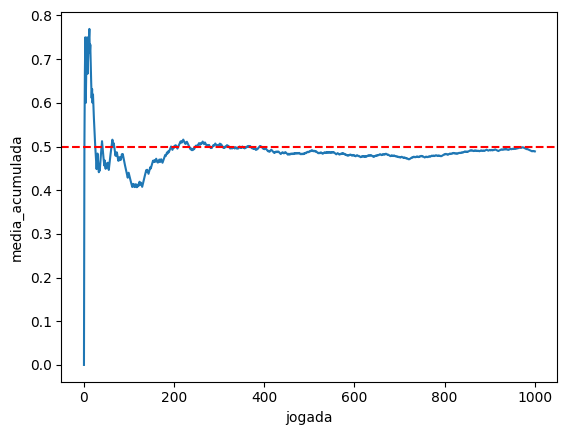

In [25]:
p = sns.lineplot(resultados, x = 'jogada', y = 'media_acumulada')
p.axhline(0.5, color = 'red', linestyle = '--')
p

Veja como a média vai se aproximando de 50% conforme vamos coletando mais dados. Essa é a lei dos grandes números em funcionamento. A média da amostra vai se aproximando da média da população à medida que coletamos mais dados.

Vejamos um exemplo agora, mas com nossa base de dados das câmaras. Vamos estimar o tempo médio de duração dos processos, coletando uma amostra aleatória de casos, variando entre 100 e 2000 como tamanho de amostra.

In [30]:
# cria uma sequência de 100 a 2000, de 50 em 50
sequencia = list(range(100, 5001, 50))

# ordena a base de câmaras em ordem aleatória
camaras_aleatorio = camaras.sample(len(camaras), random_state=1)

# para cada valor i da sequência, pegamos uma amostra dos dados de tamanho i e calculamos a média

medias = []

for i in sequencia:
  medias.append({'tamanho_amostra': i, 'media': camaras_aleatorio.head(i)['tempo'].mean()})

df_medias = pd.DataFrame(medias)

df_medias.head()

,tamanho_amostra,media
0,100,2.879261
1,150,3.016181
2,200,3.227844
3,250,3.191086
4,300,3.211791


<Axes: xlabel='tamanho_amostra', ylabel='media'>

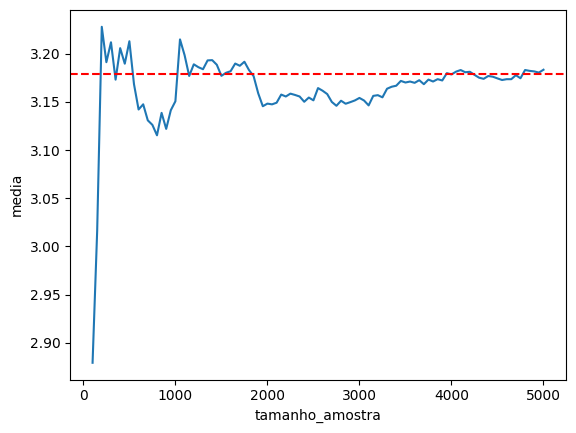

In [31]:
p = sns.lineplot(df_medias, x = 'tamanho_amostra', y = 'media')
p.axhline(camaras['tempo'].mean(), color = 'red', linestyle = '--')
p

É inevitável! Sim, porque esse é um resultado matemático.

E a conclusão dele é muito intuitiva: se coletarmos mais dados, chegamos mais próximos da estimativa que queremos. Um teorema um pouco menos intuitivo é o teorema do limite central.

### Teorema Central do Limite

O teorema central do limite (TCL) postula que, para uma amostra aleatória de tamanho suficientemente grande, a distribuição da média amostral segue uma distribuição normal. Em outras palavras, se coletarmos uma amostra grande o suficiente, a distribuição das médias amostrais será aproximadamente normal.

Na apostila sobre probabilidade e curva normal, vamos dissecar essa 'curva normal', também chamada de 'gaussiana', por conta do matemático Carl Friedrich Gauss. Por enquanto, vamos fazer uma simulação para entender como a distribuição das médias amostrais se comporta. Vamos utilizar o exemplo dos tempos dos processos.

Mas como vamos avaliar se o resultado é verdadeiro, se nem sabemos o que é curva normal nem distribuição de probabilidades?

Bem, primeiro, vamos lembrar das aulas sobre visualização de dados, e do histograma. O histograma é uma forma de visualizar a distribuição dos dados (como eles se distribuem e se aglomeram ao longo do eixo x). Outra forma é com o gráfico da densidade, que literalmente estima a distribuição de probabilidade a partir dos dados.

Então, vamos avaliar como se distribui uma lista de médias que vamos calcular com amostras aleatórias dos dados, e compará-la com essa distribuição normal.

Vamos ver, então, essa tal distribuição normal. Você vai notar que ela soa familiar:

<Axes: xlabel='x', ylabel='densidade'>

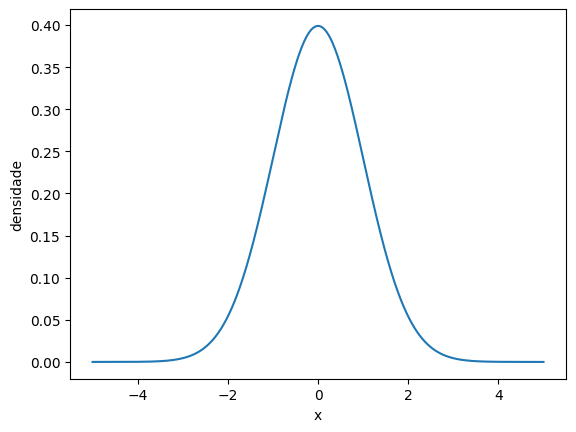

In [38]:
# plotar a distribuição normal

x = np.linspace(-5, 5, 1000)

df = pd.DataFrame({'x': x, 'densidade': norm.pdf(x)})

sns.lineplot(df, x = 'x', y = "densidade")

Essa é a distribuição normal. Mais especificamente, a distribuição normal padrão (que está centrada no zero e tem variância 1). A distribuição normal é uma das distribuições mais importantes da estatística, e é a base de muitos resultados teóricos. Ela é simétrica, tem forma de sino, e é caracterizada por dois parâmetros: a média e a variância / desvio padrão.

Agora vamos à nossa **simulação**.

In [41]:
# simular 1000 amostras de tamanho 100 a partir da base das câmaras e coletar as médias
# guardar em um dataframe do pandas

medias = []

for i in range(1000):
  amostra = camaras.sample(100, random_state = i + 1)
  medias.append({'amostra': i + 1, 'media': amostra['tempo'].mean()})

df_medias = pd.DataFrame(medias)

df_medias.head(10)

,amostra,media
0,1,2.879261
1,2,3.387187
2,3,3.535743
3,4,3.016345
4,5,3.356687
5,6,3.062560
6,7,3.110308
7,8,3.248706
8,9,3.032799
9,10,3.127146


Vamos fazer um histograma com as 30 primeiras médias que calculamos.

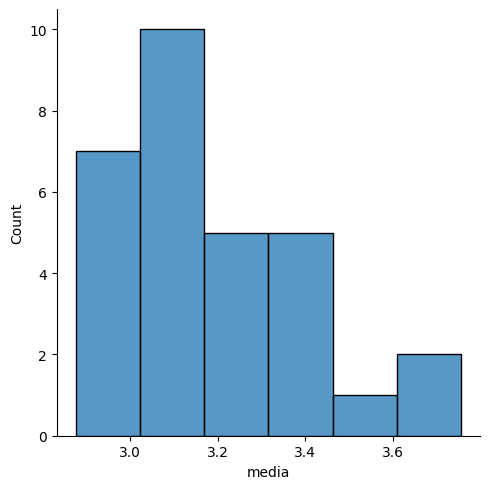

In [42]:
sns.displot(df_medias.head(30), x = 'media')

Agora, com as 300 primeiras médias.

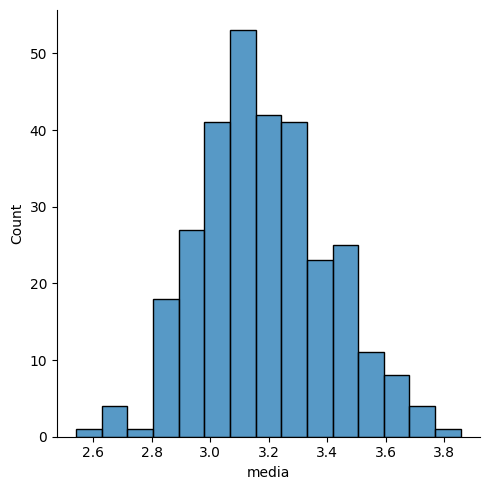

In [44]:
sns.displot(df_medias.head(300), x='media')

Está ficando mais interessante! Agora com todas as 1000 amostras. E adicionando um `kde=True` para visualizar melhor a curva.

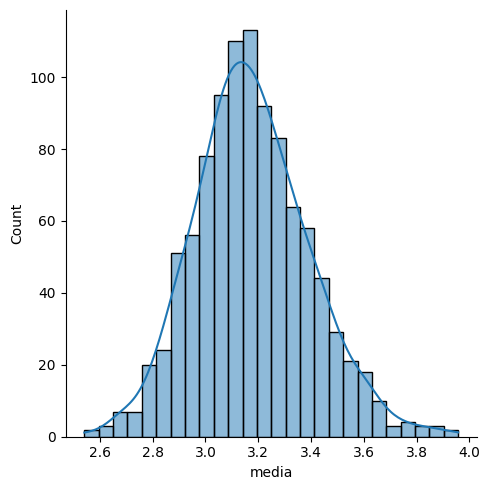

In [46]:
sns.displot(df_medias, x='media', kde=True)

Não está muito parecido com a curva normal? Pois bem, o resultado do TCL é exatamente esse.

Mas uma coisa que você pode estar pensando é: qual é a utilidade disso? Por que esse teorema é tão importante, a ponto de ganhar esse nome 'Central'?

O ponto é que podemos usar o fato da média que estamos estimando ter uma distribuição parecida com a normal para calcular margens de erro. Com base na normal, conseguimos criar intervalos de confiança para o valor de interesse. Para isso, usamos o TCL.

### Conclusões até agora

Com base no que vimos até agora, estamos seguros de que i) quanto mais dados coletarmos, melhor nos aproximamos do valor de interesse e ii) caso a gente extraia apenas uma amostra de casos, **coletada de forma aleatória**, podemos fazer afirmações sobre a população com base nessa amostra usando a distribuição normal.

Resta agora saber como **conduzir** uma pesquisa amostral.

## Técnicas de amostragem

Como vimos na seção anterior, o principal requisito para que possamos tomar conclusões sobre a população com base em uma amostra é que a amostra seja coletada de forma aleatória. Isso significa que cada elemento da população deve ter a mesma probabilidade de ser selecionado para a amostra. 

Na vida real, no entanto, nem sempre temos uma lista de todos os indivíduos que gostaríamos de analisar. Em pesquisas eleitorais, por exemplo, não é fácil obter uma lista de todos os brasileiros e, mesmo se tivéssemos essa lista, acessar todas essas pessoas pode ser algo bem complicado. Por isso que a maioria dessas pesquisas é realizada por cotas, coletando dados até atingir determinadas proporções de pessoas a partir de características demográficas conhecidas (como a proporção de mulheres na população, fornecida pelo Censo ou PNAD-Contínua).

Felizmente, no direito, não é tão difícil nos depararmos com situações onde temos a lista completa de processos. Esse é o caso da pesquisa das câmaras criminais, por exemplo. Temos acesso a todos os casos e precisamos apenas realizar a amostra aleatória.

Outro tipo comum de amostragem em projetos de ciência de dados no direito é a **amostragem sistemática**. Partindo de uma lista com todos os casos, essa técnica consiste em selecionar um caso e pular um número fixo de casos (por exemplo, 10). Esse tipo de amostragem é bastante útil em pesquisas do direito, pois, geralmente, os resultados de uma consulta de jurisprudência vêm em um site com paginação, sem que o tribunal forneça a lista completa de casos. É possível extrair a lista completa utilizando técnicas de raspagem de dados (foi o que fizemos para montar a base das câmaras), mas pode ser que isso dê muito trabalho. Ao invés disso, podemos selecionar um caso, pular 10, selecionar outro caso, pular 10, etc. 

O quanto pulamos depende do tamanho da população e o tamanho da amostra desejado. Por exemplo, se uma pesquisa de jurisprudência contém 2000 casos, e queremos analisar 100, podemos pular de 20 em 20. Dessa forma, conseguimos cobrir toda a lista de resultados de forma igualmente espaçada. Essa lista é muito próxima do que teríamos obtido por uma amostragem simples.

## Tamanho da amostra

Tem um elefante na sala. Esse elefante é: qual é o tamanho da amostra que devo considerar para confiar nos meus resultados?

Essa é uma pergunta mais complicada do que parece. O **principal erro** que as pessoas cometem é acreditar que o tamanho da amostra está relacionado com o tamanho da população. Por exemplo, se a população tem 1000 casos, então pegar 30% desses casos *já está bom*. Na verdade, pode ser que seja bom, e pode ser que não seja!

O tamanho da amostra deve considerar como base dois critérios: i) qual é a variabilidade dos dados e ii) qual é a precisão que se deseja alcançar na estimativa. Se os dados variam muito, precisamos de mais dados para conseguir estimar o que queremos. Se os dados variam pouco, podemos pegar menos casos e isso já é suficiente. Sobre a precisão, isso está relacionado à incerteza: se o objetivo for afirmar algo com 90% de confiança, precisamos de menos dados do que se o objetivo for afirmar a mesma coisa com 95% de confiança.

Existe ate uma **fórmula** de dimensionamento de amostra para estimar a média, mas ela é relativamente rara de ser utilizada:

$$n = \frac{s^2}{d^2} (z_{1-\alpha/2})^2$$

Nessa fórmula, $s$ é uma estimativa do desvio padrão dos dados, ou seja, da variabilidade. Quanto maior esse valor, maior o tamanho da amostra. No caso dos tempos, a estimativa do desvio padrão é de 2.18. Na parte de baixo, temos $d=(\bar{x} - \mu)$, que é a diferença máxima que aceitamos encontrar entre o que estamos estimando e a média encontrada. Por exemplo, podemos escolher o valor de 3 meses, ou 0.25. Finalmente, o valor $z_{1-\alpha/2}$ é retirado da distribuição normal (veremos mais adiante), em função de um erro $\alpha$ que consideramos (geralmente o valor de $\alpha$ 5% e o valor de $z_{1-\alpha/2}$ é 1.96).

**Obs**: tecnicamente o valor de $z$ deveria seguir outra distribuição, chamada $t$-student, mas é melhor não complicar as coisas agora!

Então, no nosso caso, na análise de tempos, poderíamos dimensionar a amostra da seguinte forma:

In [59]:
n = 2.18**2 / 0.25**2 * 1.96**2

np.ceil(n) # arredonda para cima

293.0

Então, chegamos a um valor de 293. Mas existem alguns problemas que você pode estar pensando.

Primeiro, esse valor de 2.18 foi estimado com os nossos dados, certo? Mas em tese nós não teríamos os dados para realizar essa estimativa. Geralmente, isso é fruto de uma pesquisa piloto, que fazemos só para estimar a variabilidade (por exemplo, com 10 ou 20 casos).

Segundo, esse valor de $d$ é arbitrário, então eu poderia usar qualquer valor. De fato, ele é arbitrário, e geralmente é definido por especialistas na área. Pode exemplo, para $d$ entre 0 e 1, até que parece razoável errar, mas não é razoável termos $d=3$, por exemplo (errar 3 anos não faz sentido para essa análise).

Terceiro, e mais importante: e se eu não tiver dinheiro/tempo para coletar os dados para completar esse tamanho de amostra? Bem, esse é um dos principais motivos para o qual essa fórmula não é tão usada no mundo real. A verdade é que os problemas práticos de execução acabam sendo mais importantes do que o dimensionamento da amostra em si. No nosso caso das drogas, por exemplo, a solução seria definir um orçamento e pegar o máximo que der dentro desse orçamento.

Existem, claro, técnicas que levam em conta tanto as propriedades de uma boa amostra quanto o custo de obtê-la. Mas isso ficaria para um curso mais avançado.